# 順序に関係した問題（巡回セールスマン問題）

・巡回セールスマン問題を例題にした順序に関係した問題の解法

DEAP
https://deap.readthedocs.io/en/master/

In [1]:
from deap import base, creator, tools, algorithms
import numpy as np
import random
import math

from scipy.spatial import distance

In [2]:
NUM_CITIES  = 8
RANGE = 1000

円形に配置

In [12]:
def generate_cities( n ):
    return list((RANGE/2*math.cos(i*math.pi*2/n)+RANGE/2,RANGE/2*math.sin(i*math.pi*2/n)+RANGE/2)for i in range( n))

【検証用の別配置】ランダムに位置を生成（円形に配置もしくはランダムに配置のどちらかを使用する）

In [4]:
def generate_cities( n ):
    return set( ( random.randrange(0,RANGE),random.randrange( 0,RANGE) ) for i in range( n) )

DEAPを使用するための設定（解析手法と初期値）

In [13]:
creator.create("Fitness", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.Fitness)

toolbox = base.Toolbox()
toolbox.register("attribute", np.random.permutation, NUM_CITIES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attribute)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

C:\Users\makino\anaconda3\envs\SimBook\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\makino\anaconda3\envs\SimBook\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


評価関数

In [14]:
def evalSalesman( individual ):
    td = 0
    for k in range(len(individual)+1):
        i = individual[k-2]
        j = individual[k-1]
        d = distance.euclidean(list(cities)[i],list(cities)[j])
        td +=d
    return ( td, )

DEAPを使用するための設定（評価，選択，交叉，突然変異）

In [15]:
toolbox.register("evaluate", evalSalesman)
toolbox.register( "mate", tools.cxOrdered )
toolbox.register( "mutate", tools.mutShuffleIndexes, indpb=0.05 )
toolbox.register("select", tools.selTournament, tournsize=3)

シミュレーションの実行

In [16]:
random.seed(1)
cities = generate_cities( NUM_CITIES )
pop = toolbox.population(n=100)
res, log = algorithms.eaSimple( pop, toolbox, cxpb = 0.8, mutpb=0.2, ngen=1000, verbose=False)

最もよい個体の表示

In [17]:
best_ind = tools.selBest(pop, 1)[0]
print("Best individual is %s" % (best_ind))
print(evalSalesman(best_ind))

Best individual is [0, 1, 2, 3, 4, 5, 6, 7]
(3444.1508912858076,)


経路の可視化

In [18]:
import matplotlib.pyplot as plt 

6, 499.9999999999999, 0.0
7, 853.5533905932737, 146.44660940672617
0, 1000.0, 500.0
1, 853.5533905932738, 853.5533905932738
2, 500.00000000000006, 1000.0
3, 146.44660940672628, 853.5533905932738
4, 0.0, 500.00000000000006
5, 146.44660940672617, 146.44660940672628
6, 499.9999999999999, 0.0


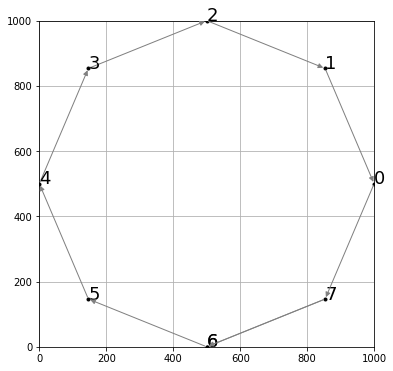

In [19]:
d = 0
plt.subplots(figsize=(6, 6))
plt.xlim(0, RANGE)
plt.ylim(0, RANGE)
plt.grid(True)

px, py, pn = [], [], []
for i in range(NUM_CITIES+1):
    n1 = best_ind[i-2]
    n2 = best_ind[i-1]
    d += distance.euclidean(list(cities)[n1], list(cities)[n2])
    print("%s, %s, %s" % (n1, list(cities)[n1][0], list(cities)[n1][1]))
    px += [list(cities)[n1][0]]
    py += [list(cities)[n1][1]]
    pn += [n1]
    plt.annotate(n1, xy=(list(cities)[n1][0], list(cities)[n1][1]),fontsize=18)
    plt.annotate('', xy=(list(cities)[n1][0], list(cities)[n1][1]),xytext=(list(cities)[n2][0], list(cities)[n2][1]),
                 arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3',facecolor='gray', edgecolor='gray'))
    
plt.plot(px, py, marker="o", color='k', markersize=3,linestyle='None')
plt.show()